<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Установка-и-импортирование-библиотек" data-toc-modified-id="Установка-и-импортирование-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка и импортирование библиотек</a></span></li><li><span><a href="#Выгрузка-и-первичный-осмотр-данных" data-toc-modified-id="Выгрузка-и-первичный-осмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выгрузка и первичный осмотр данных</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Создаем-признаки-для-прогнозирования" data-toc-modified-id="Создаем-признаки-для-прогнозирования-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создаем признаки для прогнозирования</a></span></li><li><span><a href="#Делим-данные-на-выборки" data-toc-modified-id="Делим-данные-на-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Делим данные на выборки</a></span></li><li><span><a href="#Создаем-пайплайн" data-toc-modified-id="Создаем-пайплайн-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Создаем пайплайн</a></span></li><li><span><a href="#Перебор-параметров-и-обучение-модели" data-toc-modified-id="Перебор-параметров-и-обучение-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Перебор параметров и обучение модели</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-DecisionTreeRegressor" data-toc-modified-id="Модель-DecisionTreeRegressor-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Модель DecisionTreeRegressor</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект "Прогнозирование заказов такси" 

---

# Описание исследования

---

Компания ***«Чётенькое такси»*** собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

---

# Цель исследования

---

Создать модель, которая сможет предсказывать количество заказов такси на следующий час

---

# Задачи исследования

---

1. Загрузить данные и выполнить их ресемплирование по одному часу
2. Проанализировать данные
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных
4. Проверить данные на тестовой выборке и сделать выводы

---

# Исходные данные

---

Для проведения исследования заказчик передал нам *CSV*-файл с данными о заказах такси: `taxi.csv`

Количество заказов находится в столбце `num_orders`

---

## Подготовка

### Установка и импортирование библиотек

In [1]:
!pip install -U scikit-learn -q

In [2]:
#Импорт библиотек:

#Библиотека для взаимодействия с ОС:
import os

#Библиотеки для работы с табличными данными и массивами:
import pandas as pd
import numpy as np

#Библиотека для анализа временного ряда:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Библиотеки для графической иллюстрации:
import matplotlib.pyplot as plt

#Инструменты для создания пайплайнов:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Класс для работы с пропусками
from sklearn.impute import SimpleImputer

#Библиотеки для масштабирования и кодирования данных:
from sklearn.preprocessing import (
    OneHotEncoder,
    RobustScaler,
    StandardScaler, 
    MinMaxScaler)

#Модель линейной регрессии:
from sklearn.linear_model import LinearRegression

#Модель дерева регрессии:
from sklearn.tree import DecisionTreeRegressor

#Библиотеки для создания выборок:
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV, GridSearchCV

#Библиотеки для метрик:
from sklearn.metrics import mean_squared_error, make_scorer, root_mean_squared_error

#Иморт библиотеки для градиентного бустинга:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

#Игнорирование предупреждений:
import warnings

#Задаем константы:
RANDOM_STATE = 42
TEST_SIZE = 0.1

# игнорирование предупреждений
warnings.filterwarnings("ignore")

### Выгрузка и первичный осмотр данных

In [3]:
#Локальный путь к файлу:
local_path = '/datasets/taxi.csv'

#Сетевой путь к файлу:
url_path = 'https://code.s3.yandex.net/datasets/taxi.csv'

#Проверяем наличие файла по заданному локальному пути:
if os.path.exists(local_path):
    df = pd.read_csv(local_path, index_col=[0], parse_dates=[0])
    print("Данные загружены из локального файла")

#Проверяем наличие файла по заданному сетевому пути:    
elif os.path.exists(url_path):
    df = pd.read_csv(url_path, index_col=[0], parse_dates=[0])
    print("Данные загружены из сети")
    
#Генерируем исключение (в случае отстуствия файлов по заданным путям):    
else:
    print("Данных о файле нет в локальной и сетевой директориях")
    
#Используем специальную команду отображения таблиц, для наглядного просмотра всех данных:    
pd.set_option('display.max_columns', None)

Данные загружены из локального файла


In [4]:
#Результат выгрузки:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [5]:
#Общая информация о таблице:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [6]:
#Проверка хронологического порядка расположения даты и времени:
df.index.is_monotonic

True

Итак, мы имеем Датафрейм, в котором:

> **26496 строк** и **1 столбец**

> **Пропусков** - нет

> Индекс датафрейма *Datetime* - **временной ряд**

> Интервал ряда - **10 мин**

> Данные распологаются в хронологическом порядке

Требуется поменять интервал временного ряда на 1 час в связи с поставленной задачей:

In [7]:
#Меняем интервал на 1ч:
df = df.resample('h').sum() #Считаем по агрегации сумму количества заказов

#проверка интервала:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Теперь данные подготовленны и можно переходить к их анализу

## Анализ

Проанализируем имеющийся временной ряд. Посмотрим на его сезонность, тренды и остатки:

In [8]:
print(f'Начало временного ряда: {df.head(1).index[0]} \nКонец временного ряда: {df.tail(1).index[0]}')

Начало временного ряда: 2018-03-01 00:00:00 
Конец временного ряда: 2018-08-31 23:00:00


Данные временного ряды выгружены с **1-го марта по 31-ое августа 2018 года**, т.е. у нас данные за последние 6 месяцев.

Построим графики трендов, сезонности и остатков для данного временного ряда:

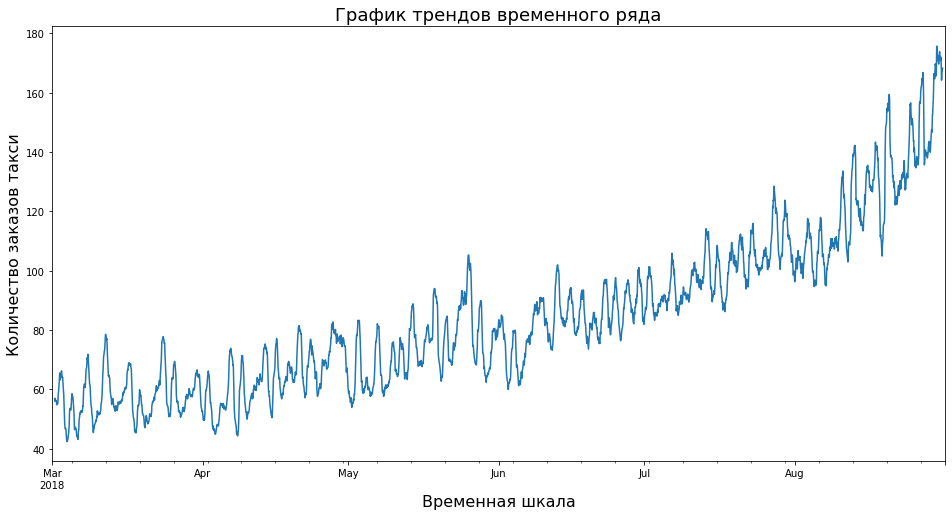

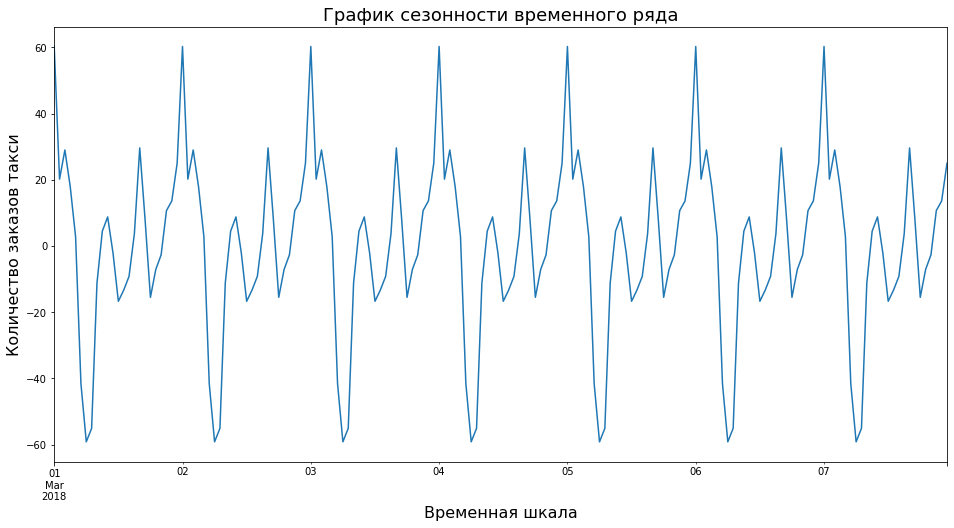

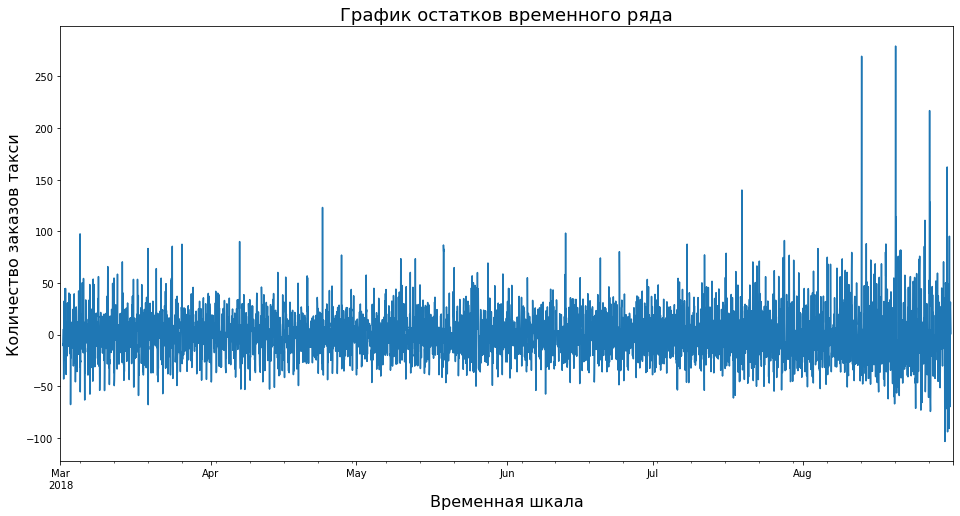

In [9]:
#Выполним разделение с помощью seasonal_decompose():
decomposed = seasonal_decompose(df)

#Построим графики трендов, сезонности и остатков в цикле:
for key, name_op in [(decomposed.trend, 'трендов'),
                     (decomposed.seasonal['2018-03-01':'2018-03-07'], 'сезонности'),
                     (decomposed.resid, 'остатков')]:

    fig, ax = plt.subplots(figsize=(16, 8))
    key.plot(ax=plt.gca())
    plt.title(f'График {name_op} временного ряда', fontsize=18)
    plt.xlabel('Временная шкала', fontsize=16)
    plt.ylabel('Количество заказов такси', fontsize=16)
    plt.show()

> **График трендов:** Количество заказов начиная с марта растет, пока не достигает пика под конец августа. Данный тренд является восходяшим

> **График сезонности:** Данный график отображает циклическое повторение данных по заданному временному интервалу. Значения колеблятся в пределах 60 заказов

> **График остатков:** Остатки колеблятся вокруг нулевого значения, под конец выделенного периода заметны выбросы

Посмотрим на общий график временного ряда, добавив скользящее среднее и стандартное отклоненние:

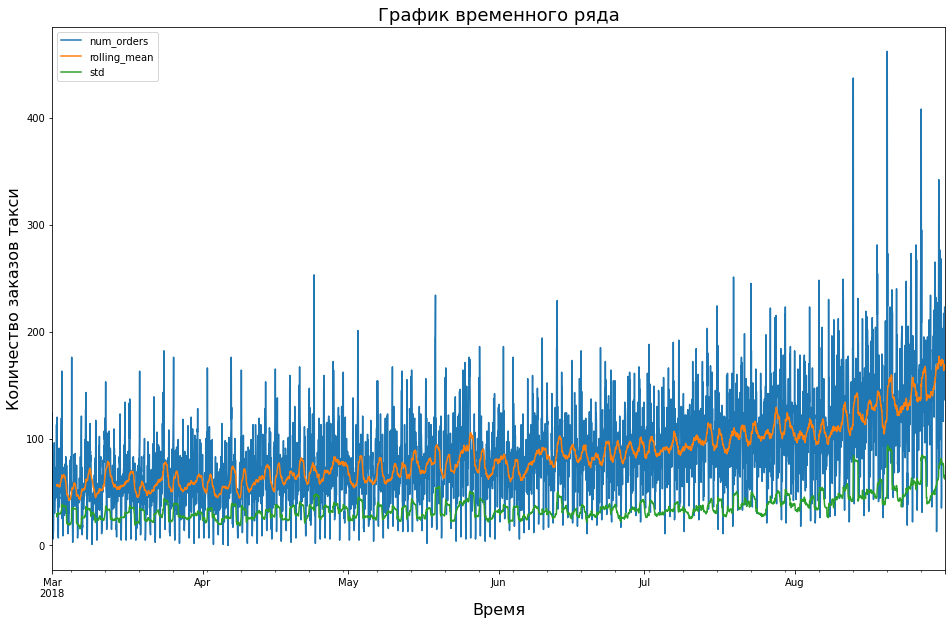

In [10]:
#Добавляем столбец скользящего среднего:
df['rolling_mean'] = df['num_orders'].rolling(24).mean()

#Добавляем столбец стандартного отклонения:
df['std'] = df['num_orders'].rolling(24).std()

fig, ax = plt.subplots(figsize=(16, 10))  # Указываем нужный размер
df.plot(ax=ax)
plt.title('График временного ряда', fontsize=18)
plt.xlabel('Время', fontsize=16)
plt.ylabel('Количество заказов такси', fontsize=16)
plt.show()

- Среднее значение временного ряда меняется - медленно растет

- Стандартное отклонение - меняется (в конце интервала есть значения с большим разбросом)

> По данным результатам можно сделать вывод о том, что данный график временного ряда - **нестационарный**

## Обучение

### Создаем признаки для прогнозирования

- Удалим столбцы с признаками скользящего среднего и стандартного отклонения, чтобы перезадать их с другими параметрами:

In [12]:
#Вначале удалим признаки скользящего среднего и стандартного отклонения:
df = df.drop('rolling_mean', axis=1)
df = df.drop('std', axis=1)

Исследуем автокорреляцию:

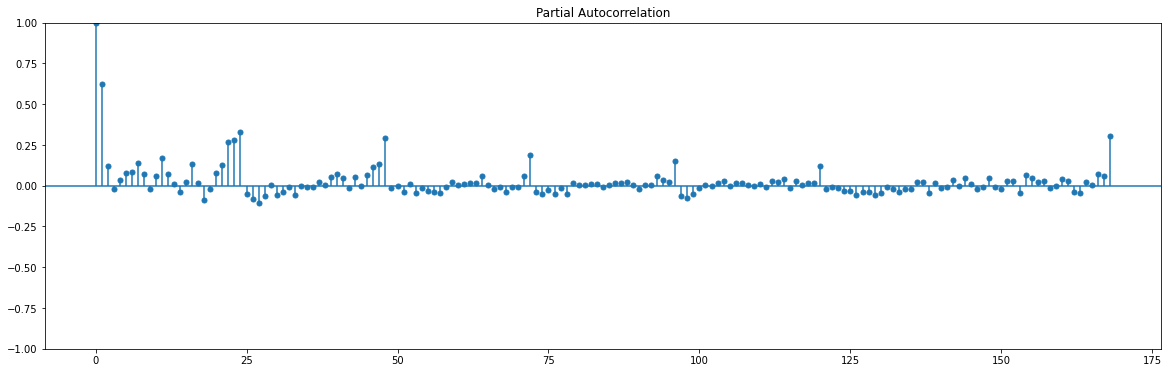

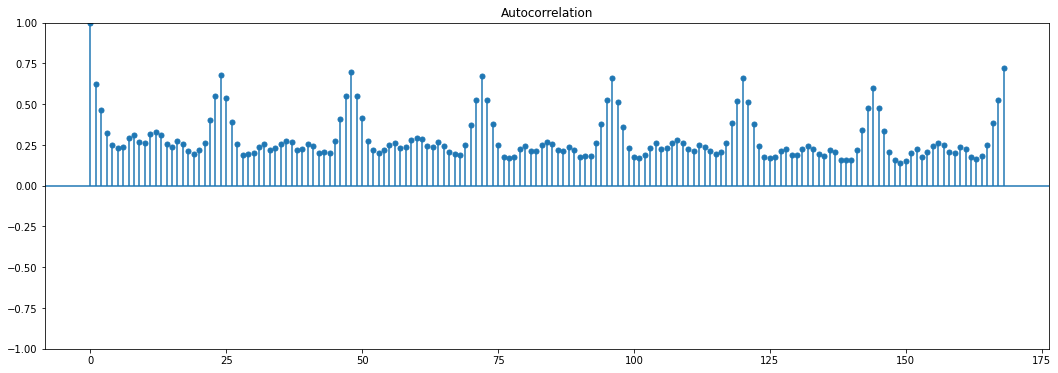

In [13]:
plot_pacf(df['num_orders'], lags=168, alpha=None).set_size_inches(20, 6)
plt.show()

plot_acf(df['num_orders'], lags=168, alpha=None).set_size_inches(18, 6)
plt.show()

> Исходя из графиков автокорреляции можно выделить пики от 24 до 170, чтобы не перегружать модель, используем значение **24** для разделения скользящего окна и добавления признаков

In [14]:
def make_features(df, max_lag, rolling_mean_size):
    
    #Добавляем столбцы: номер дня в неделе, час    
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    #Добавляем лаги, чтобы модель понимала, когда функция зависимости количества заказов от времени растет, а когда убывает:
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    #Добавляем скользящее среднее расчитаное со смещением исходного столбца 
    df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
    #df['std'] = df['num_orders'].shift().rolling(rolling_mean_size).std()    
    
#Глобальные параметры для генерации признаков:
max_lag = 24
rolling_mean_size = 24

#Вызовем функцию для создания признаков:
make_features(df, max_lag, rolling_mean_size)

#Посмотрим на полученный ДФ:
df.head(5)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Из-за добавлении новых признаков **появились пропуска**, их нужно обработать

2. Получить признаки для первых значений обучающей выборки нельзя: исторических данных по ним нет. Значения в этих наблюдениях равны **Nan** - их нужно удалить 

In [15]:
#Удаляем наблюдения с пропущенными значениями:
df = df.dropna()

#Проверка удаления:
df.head(5)

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-02 00:00:00,90,4,0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,124.0,56.833333
2018-03-02 01:00:00,120,4,1,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,85.0,55.416667
2018-03-02 02:00:00,75,4,2,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,71.0,56.875000
2018-03-02 03:00:00,64,4,3,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,66.0,57.041667
2018-03-02 04:00:00,20,4,4,64.0,75.0,120.0,90.0,58.0,113.0,66.0,61.0,45.0,73.0,44.0,43.0,66.0,48.0,32.0,30.0,96.0,64.0,69.0,34.0,15.0,12.0,6.0,43.0,56.958333


### Делим данные на выборки

In [16]:
#Отделяем входные и целевой признаки:
X = df.drop('num_orders', axis=1)

y = df['num_orders']


#Делим данные на тренеровочную и тестовую выборки:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=TEST_SIZE) 

#shuffle=False - данные не перемешиваюся

#Проверка размерности:
X_train.shape[0]  + X_test.shape[0] == df.shape[0]

True

### Создаем пайплайн

In [17]:
#Создадим списпики для кодирования и масштабирования:

#Список для кодирования с помощью OneHotEncoder:
ohe_columns = ['dayofweek', 'hour']

#Список для кодирования количественных перменных:
num_columns = ['lag_{}'.format(i) for i in range(1, max_lag+1)] + ['rolling_mean']


#SimpleImputer + OHE:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
 )


#Создаем общий пайплайн для подготовки данных:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),        
        ('num', StandardScaler(), num_columns)    
    ], 
    remainder =  'passthrough'
)

#Создаем финальный пайплайн, в котором будем перебирать методы масштабирования и различные модели:

pipe = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LinearRegression())
    ]
)

#Вызовем финальный пайплайн:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dayofweek', 'hour']),
                                                 ('num', StandardScaler(),
                                                  ['lag_1', 'lag_2', 'lag_3',
                                                   'lag_4', 'lag_5', 'lag_6',
                                                   'lag_7', 'lag_8', 'lag_9',
                                                   'lag_10', 'lag_11', 'lag_12',
                                                   'lag_13', 'lag_14', 'lag_15',
                                                   'lag_16', 'lag_17', 'lag_18',
                                                   'lag_19', 'lag_20', 'lag_21',
                                                   'lag_22', 'lag_23', 'lag_24',
                                                   'rolling_mean'])])),
                ('models', LinearRegression())])

### Перебор параметров и обучение модели

> Использовать обычныю кросс-валидацию мы не можешь, т.к. данные будут перемешиваться, для этого используем специальное разделение на блоки из библиотеки *sklearn.model_selection* ***TimeSeriesSplit***, данная функция принимает аргумент ***n_split*** - количество K-fold, как при кросс валидации

In [18]:
# Используем TimeSeriesSplit для кросс-валидации
tscv = TimeSeriesSplit(n_splits=5)

#Задаем метрику RMSE:
rmse_scorer = make_scorer(mean_squared_error, squared=False, greater_is_better=False)

#### Модель линейной регрессии

In [19]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [LinearRegression()],          
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:    
randomized_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_distributions, 
    cv=tscv,
    random_state=RANDOM_STATE,   
    scoring=rmse_scorer,    
    n_jobs=-1
)

#Обучение модели:
randomized_search.fit(X_train, y_train)

#Лучшая модель
model_linear = randomized_search.best_estimator_

#Лучшая метрика RMSE
best_score_linear_model = randomized_search.best_score_

print('Модель Линейной регрессии:')
print('-'*25)
print(f'Лучшая модель и её гиперпараметры: {model_linear}')
print('-'*25)
print(f'Лучшая метрика RMSE на кросс-валидации: {abs(round(best_score_linear_model))}')

Модель Линейной регрессии:
-------------------------
Лучшая модель и её гиперпараметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dayofweek', 'hour']),
                                                 ('num', MinMaxScaler(),
                                     

#### Модель DecisionTreeRegressor

In [20]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
     'models__max_depth': range(1,10),
     'models__min_samples_split': range(2,10),
     'models__min_samples_leaf': range(2,10),     
     'preprocessor__num': [StandardScaler(), 'passthrough']}]

#Поиск гиперпараметров:    
randomized_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_distributions, 
    cv=tscv,
    random_state=RANDOM_STATE,   
    scoring=rmse_scorer,    
    n_jobs=-1
)

#Обучение модели:
randomized_search.fit(X_train, y_train)

#Лучшая модель
model_tree = randomized_search.best_estimator_

#Лучшая метрика RMSE
best_score_tree_model = randomized_search.best_score_

print('Модель DecisionTreeRegressor:')
print('-'*25)
print(f'Лучшая модель и её гиперпараметры: {model_tree}')
print('-'*25)
print(f'Лучшая метрика RMSE на кросс-валидации: {abs(round(best_score_tree_model))}')

Модель DecisionTreeRegressor:
-------------------------
Лучшая модель и её гиперпараметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dayofweek', 'hour']),
                                                 ('num', StandardScaler(),
                                

#### Модель LightGBM

In [21]:
#Перебор методов масштабирования и гиперпараметров: 
param_distributions = [  
    {'models': [LGBMRegressor(max_depth=3, n_estimators=10)],
     'models__num_leaves': [20, 30],
     'models__learning_rate': [0.2, 0.3],     
     'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']}]

#Поиск гиперпараметров:
    
randomized_search = RandomizedSearchCV(
    pipe, 
    param_distributions=param_distributions, 
    cv=tscv,    
    random_state=RANDOM_STATE,
    scoring=rmse_scorer,
    n_iter=10,
    n_jobs=1
)

#Обучение модели:
randomized_search.fit(X_train, y_train)

#Лучшая модель
model_lgbm = randomized_search.best_estimator_

#Лучшая метрика RMSE
best_score_lgbm_model = randomized_search.best_score_

print('Модель LightGBM:')
print('-'*25)
print(f'Лучшая модель и её гиперпараметры: {model_lgbm}')
print('-'*25)
print(f'Лучшая метрика RMSE на кросс-валидации: {abs(round(best_score_lgbm_model))}')

Модель LightGBM:
-------------------------
Лучшая модель и её гиперпараметры: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dayofweek', 'hour']),
                                                 ('num', MinMaxScaler(),
                                               

## Тестирование

В результате обучения трёх моделей лучшую метрику RMSE показала модель линейной регрессии - именно эту модель мы будем использовать для предсказаний значений тестовой выборки:

In [22]:
#Делаем предикты по лучшей модели:
y_pred_linear_reg = model_linear.predict(X_test)

#Метрика RMSE на тестовых данных:
print('Модель Линейной регрессии:')
print(f'Значение метрики RMSE (лучшей модели) на тесте: {round(root_mean_squared_error(y_pred_linear_reg, y_test),2)}')

Модель Линейной регрессии:
Значение метрики RMSE (лучшей модели) на тесте: 41.91


Значение метрики RMSE на тестовых данных оказалось меньше 48, что подходит под требования заказчика

## Вывод

**Постановленная задача**

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.
Значение метрики RMSE на тестовой выборке должно быть не больше 48.

---

**Шаг №1. Подготовка данных**

Обработка исходного CSV-файла c данными о количестве заказов такси. В результате выгрузки данных получили сравнительно небольшой датафрейм состоящий из двух столбцов `num_orders` (количество заказов такси) и `datetime` (временной ряд), размер самого датафрейма - **26496 строк**. 

Для дальнейшего прогнозирования потребовалась проверка на монотонность временного ряда, а также изменение интервала наблюдейний (ресемплирование данных на интервал в 1 час).

---

**Шаг №2. Анализ модели**

Данные выгружены за полгода с начала марта и по конец августа 2018 года.

Для детального анализа были разобраны тренды, сезонность и остатки, которые показали, что под конец временного периода наблюдается увеличение разброса и количества заказов.

Построен общий график временного ряда, исходя из его анализа он оказался - **нестационарным** (по таким графима сложно делать предсказания), поэтому было решено привести его к стационарному виду с помощью разности временных рядов со сдвигом в 1 позицию.

---


**Шаг №3. Обучение модели**

Для обучения мы использовали следующие модели:

- Линейная регрессия

- Дерево регрессий 

- LightGBM

Для каждой из моделей был сделан перебор гиперпараметров и выявлена лучшая метрика RMSE и лучшая модель. Т.к. использовать обычную кросс-валидацию для временного ряда нельзя из-за перемешивания параметров, мы использовали разделение специальной функцией `TimeSeriesSplit` из sklearn, которая предназначена для работы с временными рядами

---

**Шаг №4. Тестирование**

В результате обучения трёх моделей лучшую метрику RMSE показала модель линейной регрессии - именно эту модель мы будем использовать для предсказаний значений тестовой выборки:

> **Метрика RMSE** на тесте: **41.91**

Значение метрики RMSE на тестовых данных оказалось меньше 48, что подходит под требования заказчика. Данную модель можно использовать для предсказания количества заказов такси в будущем. 


Исходя из полученных результатов и требования заказчика (метрика по RMSE меньше 48), можно выделить модель линейной регрессии, которая показала лучшие значения метрики как на кросс-валидации, так и на тетовой выборке

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48